In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8,6
sns.set_style('whitegrid')

In [3]:
dataset = pd.read_csv('finished_processed.csv')
dataset.drop(['backers_count', 'usd_pledged'], axis=1, inplace=True)
target = dataset['state']
features = dataset.drop(['state'], axis=1)
feature_names = features.keys()
feature_names

Index(['category', 'country', 'creator', 'currency', 'goal', 'staff_pick',
       'location', 'blurb_length', 'duration'],
      dtype='object')

In [10]:
pca = PCA()
dataset_pca = pca.fit_transform(features)
pca.explained_variance_ratio_

array([  1.00000000e+00,   3.88279233e-11,   5.98940451e-15,
         1.23042562e-16,   2.71556420e-18,   2.64903140e-18,
         2.48482173e-18,   7.28609137e-19,   2.99694085e-19])

In [11]:
print(pca.explained_variance_ratio_.sum())
components = pd.DataFrame(pca.components_,columns=feature_names)
components

1.0


,category,country,creator,currency,goal,staff_pick,location,blurb_length,duration
0,-3.106149e-10,1.125183e-11,1.000000e+00,4.256608e-12,-9.184906e-13,-3.730099e-14,4.013501e-09,-2.388755e-12,-1.734980e-12
1,5.050901e-05,-3.985366e-05,-4.013485e-09,-2.476963e-05,-3.635610e-07,-3.080914e-08,1.000000e+00,1.136851e-06,5.833781e-06
2,-9.999885e-01,3.794419e-03,-3.108718e-10,2.749137e-03,-3.357017e-05,1.621408e-04,5.073346e-05,-3.701027e-04,-9.071214e-04
3,-4.678063e-03,-8.329564e-01,1.045006e-11,-5.532993e-01,1.285930e-03,-1.253239e-03,-4.664309e-05,-2.927291e-03,-3.127615e-03
4,-8.345498e-04,-4.972605e-06,2.653080e-12,-5.221512e-03,5.354242e-01,-7.823608e-03,-4.415833e-06,5.050568e-01,6.768674e-01
5,3.712890e-04,3.080060e-03,-9.381597e-13,1.324644e-03,7.853865e-01,3.470902e-03,2.140904e-06,-5.925083e-01,-1.791049e-01
6,4.086888e-04,-8.044224e-04,6.558124e-13,2.652517e-03,3.106080e-01,-3.225262e-03,3.577466e-06,6.275177e-01,-7.139510e-01
7,-1.873477e-04,5.533018e-01,-2.755036e-12,-8.329142e-01,-1.997303e-03,-9.181017e-03,1.456644e-06,-2.474702e-04,-4.762993e-03
8,1.480689e-04,4.022382e-03,1.015194e-13,-8.378465e-03,2.448229e-03,9.999152e-01,-5.294313e-08,8.026613e-03,3.567323e-03


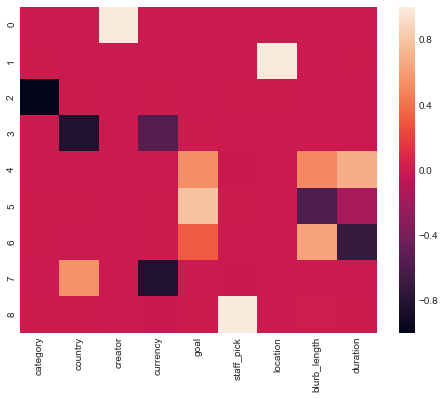

In [12]:
sns.heatmap(components)

In [13]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.externals import joblib

rf = joblib.load('model.pkl')

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)
pca.fit(X_train)
pca.n_components_

9

In [14]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=14,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test_pca)
print(accuracy_score(y_test, predicted))
print(1 - rf.oob_score_)
print(rf.feature_importances_)

0.777396593674
0.223237820258
[ 0.05662408  0.04234016  0.51506521  0.05893692  0.04518662  0.04768983
  0.05002362  0.04494649  0.13918708]
